In [36]:
#installing all necessary libraries
import pandas as pd
import numpy as np

In [37]:
transactions = pd.read_csv('Retail_Data_Transactions.csv')
transactions

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [38]:
transactions.dtypes

customer_id    object
trans_date     object
tran_amount     int64
dtype: object

In [39]:
response = pd.read_csv('Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [40]:
response.dtypes

customer_id    object
response        int64
dtype: object

In [41]:
df = pd.merge(transactions, response, on='customer_id', how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [42]:
# features
df.dtypes

customer_id     object
trans_date      object
tran_amount      int64
response       float64
dtype: object

In [43]:
df.shape

(125000, 4)

In [44]:
df.head()

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0


In [45]:
df.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [46]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [47]:
# missing values
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

out of 125000 only 31 places where the customers has given no response

In [48]:
df=df.dropna()

In [49]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [50]:
# changing datatypes
df['trans_date'] = pd.to_datetime(df['trans_date'])
df

C:\Users\rajba\AppData\Local\Temp\ipykernel_8904\911100298.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date'] = pd.to_datetime(df['trans_date'])
C:\Users\rajba\AppData\Local\Temp\ipykernel_8904\911100298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date'] = pd.to_datetime(df['trans_date'])


,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1.0
1,CS4768,2015-03-15,39,1.0
2,CS2122,2013-02-26,52,0.0
3,CS1217,2011-11-16,99,0.0
4,CS1850,2013-11-20,78,0.0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0.0
124996,CS7232,2014-08-19,38,0.0
124997,CS8731,2014-11-28,42,0.0
124998,CS8133,2013-12-14,13,0.0


In [51]:
set(df['response'])

{0.0, 1.0}

we can convert it to INT as we don't require float datatype

In [52]:
df['response'] = df['response'].astype(int)
df

C:\Users\rajba\AppData\Local\Temp\ipykernel_8904\3692541175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response'] = df['response'].astype(int)


,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [53]:
# check for outliers
#Z-SCORE

from scipy import stats
import numpy as np

#calculate z-score
z_scores = np.abs(stats.zscore(df['tran_amount']))
print(z_scores)

#set threshold

threshold = 3
outliers = (z_scores > threshold)

print(df[outliers])

0         1.312125
1         1.137147
2         0.568467
3         1.487529
4         0.568892
            ...   
124995    0.043532
124996    1.180892
124997    1.005913
124998    2.274506
124999    1.268381
Name: tran_amount, Length: 124969, dtype: float64
Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


In [54]:
# check for outliers
#Z-SCORE

from scipy import stats
import numpy as np

#calculate z-score
z_scores = np.abs(stats.zscore(df['response']))
print(z_scores)

#set threshold

threshold = 3
outliers = (z_scores > threshold)

print(df[outliers])

0         2.833416
1         2.833416
2         0.352931
3         0.352931
4         0.352931
            ...   
124995    0.352931
124996    0.352931
124997    0.352931
124998    0.352931
124999    0.352931
Name: response, Length: 124969, dtype: float64
Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


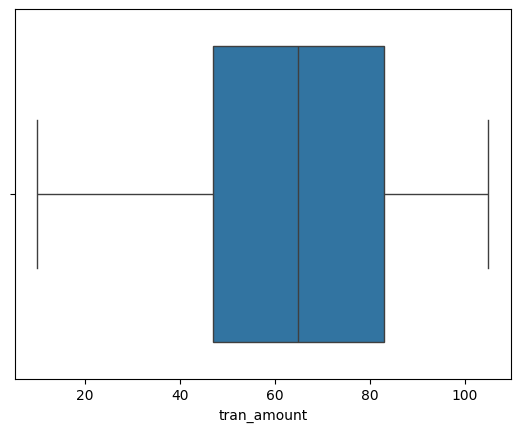

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['tran_amount'])
plt.show()

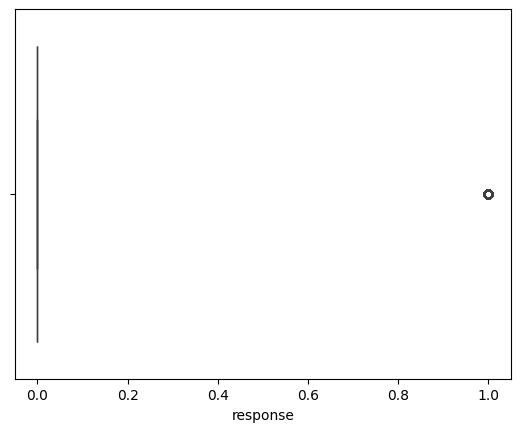

In [56]:
import matplotlib.pyplot as plt

sns.boxplot(x=df['response'])
plt.show()

In [57]:
# creating new column

df['month']=df['trans_date'].dt.month
df

C:\Users\rajba\AppData\Local\Temp\ipykernel_8904\2580458284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['trans_date'].dt.month


,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [58]:
#use group by

monthly_sales = df.groupby('month')['tran_amount'].sum()
monthly_sales = monthly_sales.sort_values(ascending=False).reset_index()
monthly_sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089
3,7,717011
4,12,709795
5,11,698024
6,6,697014
7,9,694201
8,2,645028
9,3,636475


# Which three months has had the highest transaction amount?
Ans. August, October, and January

In [35]:
monthly_sales.head(3)

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


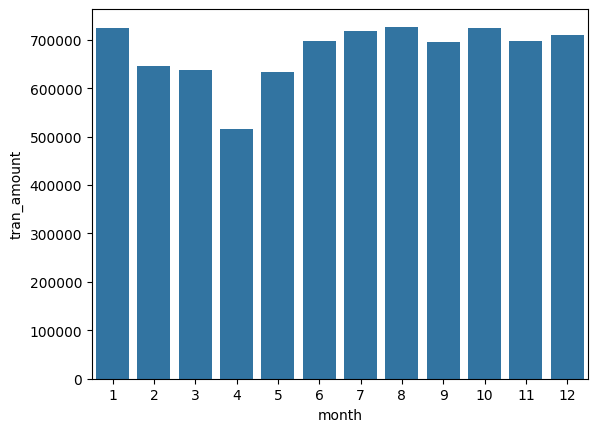

In [84]:
sns.barplot(x='month', y='tran_amount', data=monthly_sales)
plt.show()

In [65]:
# Which customers have highest no. of orders?

customer_counts = df['customer_id'].value_counts().reset_index()
customer_counts

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35
...,...,...
6879,CS8559,4
6880,CS7224,4
6881,CS7716,4
6882,CS8504,4


In [64]:
customer_counts.columns = ['customer_id', 'count']
customer_counts

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35
...,...,...
6879,CS8559,4
6880,CS7224,4
6881,CS7716,4
6882,CS8504,4


Q. Top 5 Customers with highest no of orders
Ans. CS4424, CS4320, CS3799, CS3013, CS1215

In [74]:
top_5_customers = customer_counts.sort_values(by='count', ascending=False).head(5)
top_5_customers

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


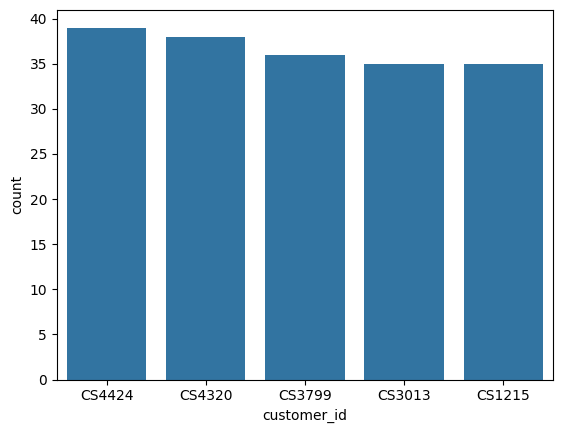

In [75]:
sns.barplot(x='customer_id', y='count', data=top_5_customers)
plt.show()

In [81]:
# Which customers have highest value of orders?

customer_sales = df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales.columns = ['customer_id', 'tran_amount']

customer_sales

,customer_id,tran_amount
0,CS1112,1012
1,CS1113,1490
2,CS1114,1432
3,CS1115,1659
4,CS1116,857
...,...,...
6879,CS8996,582
6880,CS8997,543
6881,CS8998,624
6882,CS8999,383


In [82]:
top_5_sales = customer_sales.sort_values(by='tran_amount', ascending=False).head(5)
top_5_sales

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


We can see that customer CS4424 and CS4320

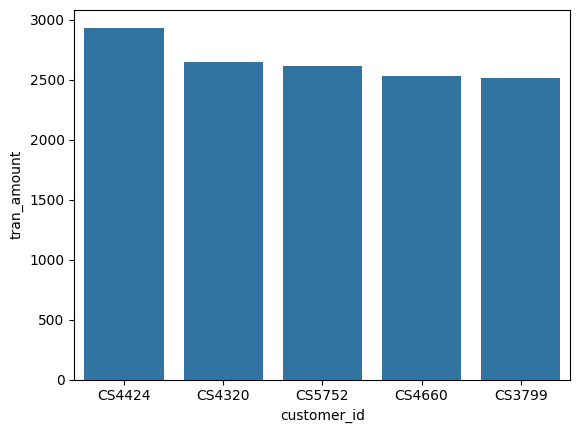

In [88]:
sns.barplot(x='customer_id', y='tran_amount', data=top_5_sales)
plt.show()

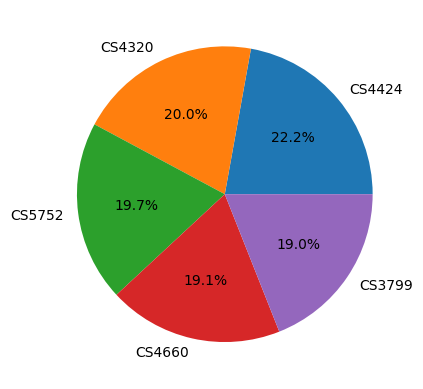

In [93]:
# extract the customer_id and tran_amount columns
customer_ids = top_5_sales['customer_id']
tran_amounts = top_5_sales['tran_amount']

# create the pie chart
plt.pie(tran_amounts, labels=customer_ids, autopct='%1.1f%%')

# show the plot
plt.show()

**Advanced Analytics**

Time Series Analysis

C:\Users\rajba\AppData\Local\Temp\ipykernel_8904\874511790.py:2: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'M' instead.
  df['month_year'] = df['trans_date'].dt.to_period('m')
C:\Users\rajba\AppData\Local\Temp\ipykernel_8904\874511790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year'] = df['trans_date'].dt.to_period('m')


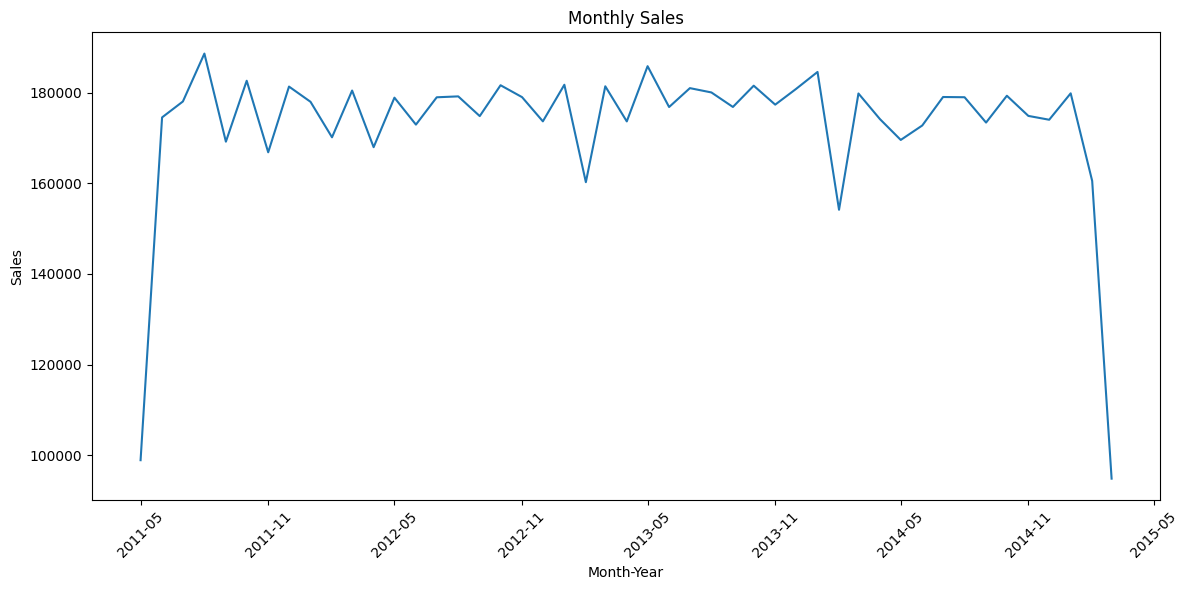

In [102]:
import matplotlib.dates as mdates
df['month_year'] = df['trans_date'].dt.to_period('m')
monthly_sales = df.groupby('month_year')['tran_amount'].sum()

monthly_sales.index = monthly_sales.index.to_timestamp()


plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))

plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Cohort Segmentation

In [120]:
# Recency

recency = df.groupby('customer_id')['trans_date'].max()

# Frequency

frequency = df.groupby('customer_id')['trans_date'].count()

# Monetary

monetary = df.groupby('customer_id')['tran_amount'].sum()

#combining all three

rfm = pd.concat([recency, frequency, monetary], axis=1)
rfm.columns = ['recency', 'frequency', 'monetary']

rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [127]:
# customer segmentation

def segment_customer(row):
    if row['recency'].year>=2012 and row['frequency']>=15 and row['monetary']>1400:
        return 'VIP'
    elif row['recency'].year>=2012 and row['frequency']>=10 and row['monetary']>1000:
        return 'Gold'
    elif row['recency'].year>=2012 and row['frequency']>=5 and row['monetary']>500:
        return 'Silver'
    else:
        return 'Bronze'

rfm['segment'] = rfm.apply(segment_customer, axis=1)
rfm.sort_values(by='segment', ascending=False)

,recency,frequency,monetary,segment
customer_id,,,,
CS3337,2014-09-28,25,1579,VIP
CS3826,2015-02-07,24,1583,VIP
CS3808,2015-02-13,26,2058,VIP
CS3809,2015-02-08,21,1418,VIP
CS3812,2015-02-20,26,1789,VIP
...,...,...,...,...
CS7335,2014-11-15,9,432,Bronze
CS8572,2014-08-17,10,490,Bronze
CS7839,2014-04-02,11,492,Bronze


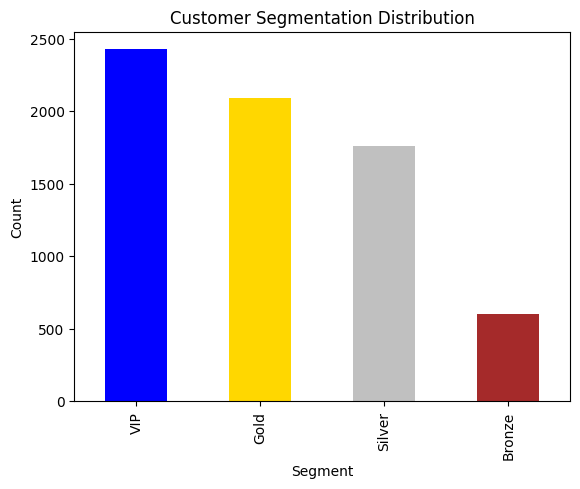

In [135]:
colors = {'VIP': 'blue', 'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'brown'}

segment_counts = rfm['segment'].value_counts()

segment_counts.plot(kind='bar', color=[colors.get(x, 'blue') for x in segment_counts.index])

plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Customer Segmentation Distribution')

plt.show()

Churn Analysis

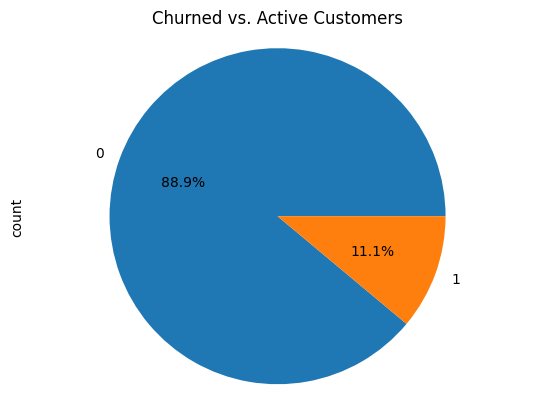

In [156]:
churn_count = df['response'].value_counts()

churn_count.plot(kind='pie', autopct='%1.1f%%')

plt.title('Churned vs. Active Customers')
plt.axis('equal')
plt.show()

<Axes: xlabel='month_year'>

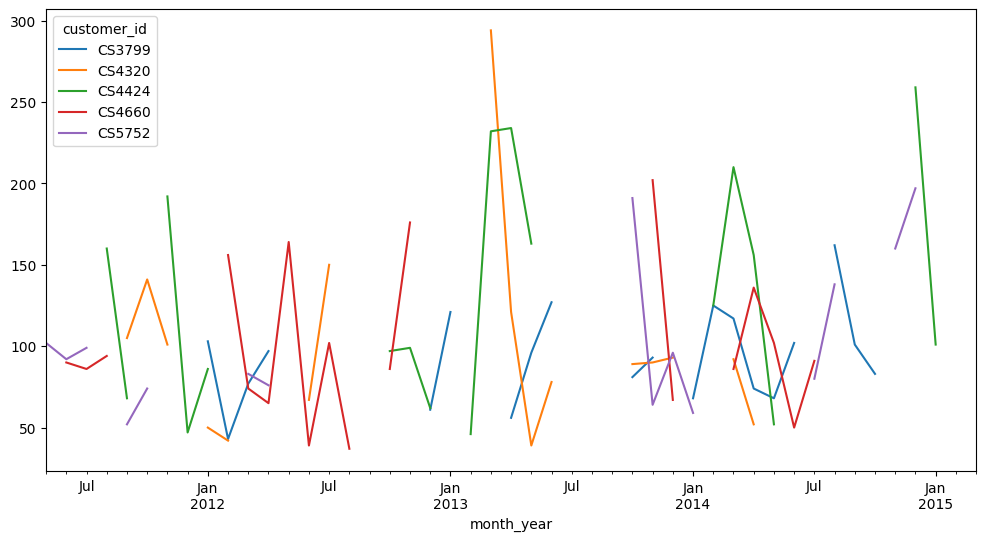

In [161]:
top_5_cus = monetary.sort_values(ascending=False).head(5).index

top_customers_df = df[df['customer_id'].isin(top_5_cus)]

top_customer_sales = top_customers_df.groupby(['customer_id', 'month_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind='line', figsize=(12, 6))

In [191]:
# count the nos. of churned and active customers in each segment

#VIP
churn_count = rfm[rfm['segment']=='VIP'].shape[0]
active_count = rfm[rfm['segment']!='VIP'].shape[0]

print('Churned Customers in VIP:', churn_count)
print('Active Customers in VIP:', active_count)

#Gold
churn_count = rfm[rfm['segment']=='Gold'].shape[0]
active_count = rfm[rfm['segment']!='Gold'].shape[0]

print('\nChurned Customers in Gold:', churn_count)
print('Active Customers in Gold:', active_count)

#Silver
churn_count = rfm[rfm['segment']=='Silver'].shape[0]
active_count = rfm[rfm['segment']!='Silver'].shape[0]

print('\nChurned Customers in Silver:', churn_count)
print('Active Customers in Silver:', active_count)

#Bronze
churn_count = rfm[rfm['segment']=='Bronze'].shape[0]
active_count = rfm[rfm['segment']!='Bronze'].shape[0]

print('\nChurned Customers in Bronze:', churn_count)
print('Active Customers in Bronze:', active_count)



Churned Customers in VIP: 2427
Active Customers in VIP: 4457

Churned Customers in Gold: 2092
Active Customers in Gold: 4792

Churned Customers in Silver: 1761
Active Customers in Silver: 5123

Churned Customers in Bronze: 604
Active Customers in Bronze: 6280


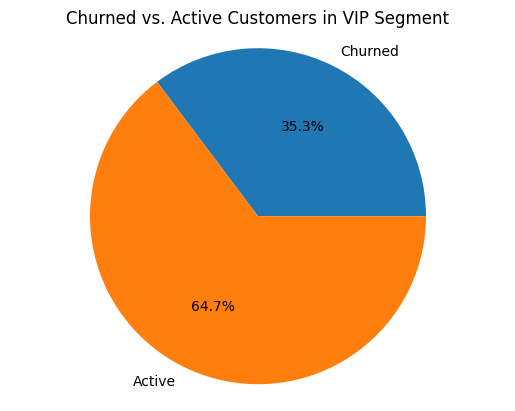

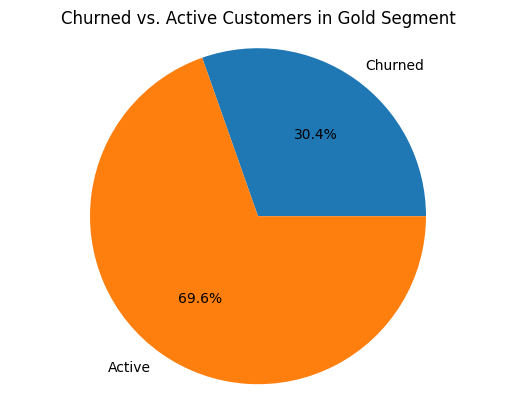

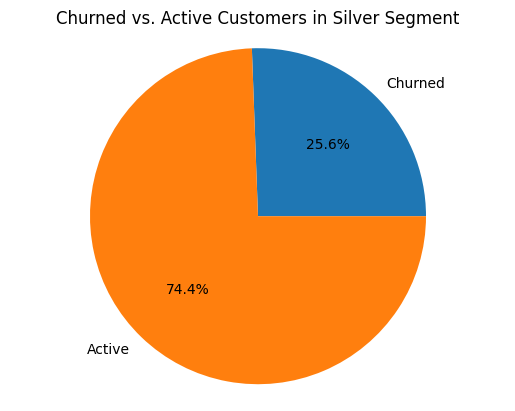

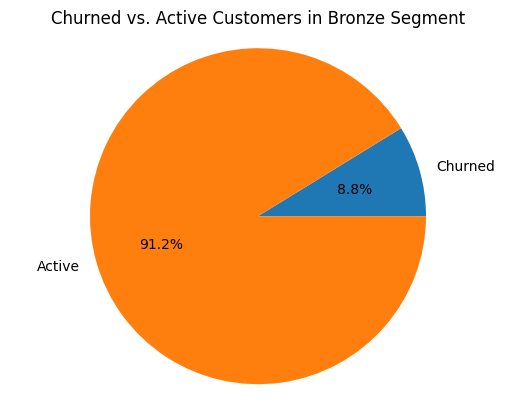

In [193]:
# Count the number of churned and active customers for each segment
churn_count = rfm[rfm['segment']=='VIP'].shape[0]
active_count = rfm[rfm['segment']!='VIP'].shape[0]

# Create a pie chart for churned vs. active customers
plt.pie([churn_count, active_count], labels=['Churned', 'Active'], autopct='%1.1f%%')

plt.title('Churned vs. Active Customers in VIP Segment')
plt.axis('equal')
plt.show()

churn_count = rfm[rfm['segment']=='Gold'].shape[0]
active_count = rfm[rfm['segment']!='Gold'].shape[0]

plt.pie([churn_count, active_count], labels=['Churned', 'Active'], autopct='%1.1f%%')

plt.title('Churned vs. Active Customers in Gold Segment')
plt.axis('equal')
plt.show()

churn_count = rfm[rfm['segment']=='Silver'].shape[0]
active_count = rfm[rfm['segment']!='Silver'].shape[0]

plt.pie([churn_count, active_count], labels=['Churned', 'Active'], autopct='%1.1f%%')

plt.title('Churned vs. Active Customers in Silver Segment')
plt.axis('equal')
plt.show()

churn_count = rfm[rfm['segment']=='Bronze'].shape[0]
active_count = rfm[rfm['segment']!='Bronze'].shape[0]

plt.pie([churn_count, active_count], labels=['Churned', 'Active'], autopct='%1.1f%%')

plt.title('Churned vs. Active Customers in Bronze Segment')
plt.axis('equal')
plt.show()

In [199]:
df.to_csv('retail_data_analysis.csv', index=False)
rfm.to_csv('additional_analysis.csv')